In [2]:
from pathlib import Path
data_root = Path('../kkdata3')
for x in data_root.glob('*'):
    print(x)

..\kkdata3\label_test_source.parquet
..\kkdata3\label_train_source.parquet
..\kkdata3\label_train_target.parquet
..\kkdata3\meta_song.parquet
..\kkdata3\meta_song_composer.parquet
..\kkdata3\meta_song_genre.parquet
..\kkdata3\meta_song_lyricist.parquet
..\kkdata3\meta_song_producer.parquet
..\kkdata3\meta_song_titletext.parquet
..\kkdata3\sample.csv


In [3]:
import pandas as pd
train_source = pd.read_parquet(data_root / 'label_train_source.parquet')
train_target = pd.read_parquet(data_root / 'label_train_target.parquet')
test_source = pd.read_parquet(data_root / 'label_test_source.parquet')
meta_song = pd.read_parquet(data_root / 'meta_song.parquet')
meta_song_composer = pd.read_parquet(data_root / 'meta_song_composer.parquet')
meta_song_genre = pd.read_parquet(data_root / 'meta_song_genre.parquet')
meta_song_lyricist = pd.read_parquet(data_root / 'meta_song_lyricist.parquet')
meta_song_producer = pd.read_parquet(data_root / 'meta_song_producer.parquet')
meta_song_titletext = pd.read_parquet(data_root / 'meta_song_titletext.parquet')


train_source.dtypes

session_id          int64
song_id            object
unix_played_at      int64
play_status         int64
login_type          int64
listening_order     int64
dtype: object

In [4]:
train_target.describe()

,session_id,unix_played_at,play_status,login_type,listening_order
count,2.861295e+06,2.861295e+06,2.861295e+06,2.861295e+06,2.861295e+06
mean,3.576616e+05,1.663106e+09,9.488878e-01,1.275440e+01,2.300000e+01
std,2.064962e+05,2.283671e+06,9.125107e-01,1.439823e+01,1.414214e+00
min,1.000000e+00,1.659226e+09,-1.000000e+00,0.000000e+00,2.100000e+01
25%,1.788310e+05,1.661099e+09,0.000000e+00,7.000000e+00,2.200000e+01
50%,3.576620e+05,1.663110e+09,1.000000e+00,7.000000e+00,2.300000e+01
75%,5.364930e+05,1.665071e+09,2.000000e+00,8.000000e+00,2.400000e+01
max,7.153230e+05,1.667145e+09,8.000000e+00,6.000000e+01,2.500000e+01


In [5]:
import rich
print("train_source")
rich.print(train_source.dtypes)
print("train_target")
rich.print(train_target.dtypes)
print("test_source")
rich.print(test_source.dtypes)
print("meta_song")
rich.print(meta_song.dtypes)
print("meta_song_composer")
rich.print(meta_song_composer.dtypes)
print("meta_song_genre")
rich.print(meta_song_genre.dtypes)
print("meta_song_lyricist")
rich.print(meta_song_lyricist.dtypes)
print("meta_song_producer")
rich.print(meta_song_producer.dtypes)
print("meta_song_titletext")


train_source


session_id          int64
song_id            object
unix_played_at      int64
play_status         int64
login_type          int64
listening_order     int64
dtype: object

train_target


session_id          int64
song_id            object
unix_played_at      int64
play_status         int64
login_type          int64
listening_order     int64
dtype: object

test_source


session_id          int64
song_id            object
unix_played_at      int64
play_status         int64
login_type          int64
listening_order     int64
dtype: object

meta_song


song_id         object
artist_id      float64
song_length    float64
album_id       float64
language_id    float64
album_month     object
dtype: object

meta_song_composer


song_id        object
composer_id    object
dtype: object

meta_song_genre


song_id     object
genre_id    object
dtype: object

meta_song_lyricist


song_id        object
lyricist_id    object
dtype: object

meta_song_producer


song_id        object
producer_id    object
dtype: object

meta_song_titletext


In [6]:
# convert timestamp to datetime
train_source['dt'] = pd.to_datetime(train_source['unix_played_at'], unit='s')

In [7]:
train_source

,session_id,song_id,unix_played_at,play_status,login_type,listening_order,dt
0,751,6027767fad949f3ca5e772df04924949,1659598909,1,7,1,2022-08-04 07:41:49
1,751,041547bddb0a3e730f32db84c65868ca,1659599182,1,7,2,2022-08-04 07:46:22
2,751,041547bddb0a3e730f32db84c65868ca,1659599184,0,7,3,2022-08-04 07:46:24
3,751,041547bddb0a3e730f32db84c65868ca,1659599185,0,7,4,2022-08-04 07:46:25
4,751,8b32f88104ecf859be934d9b45f30cd1,1659599218,1,7,5,2022-08-04 07:46:58
...,...,...,...,...,...,...,...
11445175,458622,3ba8c1e455e27172edec64deff3a8b15,1662339887,2,7,16,2022-09-05 01:04:47
11445176,458622,3ba8c1e455e27172edec64deff3a8b15,1662340090,2,7,17,2022-09-05 01:08:10
11445177,458622,3ba8c1e455e27172edec64deff3a8b15,1662340294,2,7,18,2022-09-05 01:11:34
11445178,458622,3ba8c1e455e27172edec64deff3a8b15,1662340497,2,7,19,2022-09-05 01:14:57


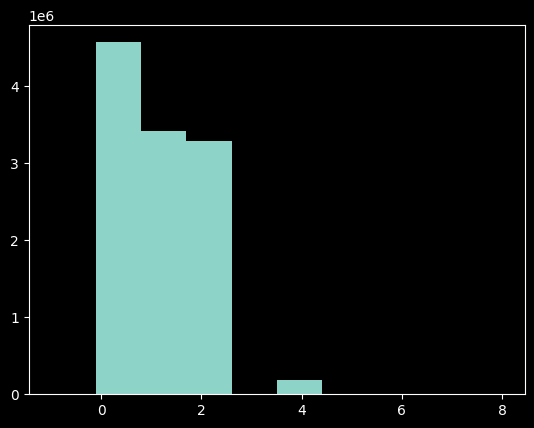

In [8]:
import matplotlib.pyplot as plt
plt.hist(train_source['play_status'], bins=10);

In [9]:
train_source['play_status'].value_counts()

play_status
 0    4560772
 1    3411409
 2    3280395
 4     181491
 3       8496
 8       1685
-1        926
 7          6
Name: count, dtype: int64

In [10]:
train_source['song_id'].unique().shape

(650872,)

In [11]:

test_source['song_id'].unique().shape

(339994,)

In [12]:
train_Y = train_target.pivot_table(index='session_id', columns='listening_order', values='song_id', aggfunc='first', fill_value=0)

In [13]:
train_target[['session_id', 'listening_order']].drop_duplicates().shape

(2861295, 2)

In [14]:
train_target['song_id'].value_counts()[:5].keys()

Index(['c75e75a6baf65a3c26dbe641422d4e72', '18a62aea3e0e67e21ea56c125c29c474',
       'd0f29a768191d3f75a4722789793db64', '1d684646c631273827eed57fbd2829a6',
       'ef71212934e35b400232a0cd8e7e67a2'],
      dtype='object', name='song_id')

In [15]:
top5 = ['c75e75a6baf65a3c26dbe641422d4e72', '18a62aea3e0e67e21ea56c125c29c474',
       'd0f29a768191d3f75a4722789793db64', '1d684646c631273827eed57fbd2829a6',
       'ef71212934e35b400232a0cd8e7e67a2']
top4 = top5[:4]
train_target['in_top5'] = train_target['song_id'].isin(top5)
train_target['in_top4'] = train_target['song_id'].isin(top4)

In [16]:
top5_result = train_target.pivot_table(index='session_id', columns='listening_order', values='in_top5', aggfunc='first', fill_value=0)
top4_result = train_target.pivot_table(index='session_id', columns='listening_order', values='in_top4', aggfunc='first', fill_value=0)

In [17]:
(top5_result @ [1.0, 0.63, 0.5, 0.43, 0.38]).mean()

0.018851761178067968

In [18]:
(top4_result @ [1.0, 0.63, 0.5, 0.43, 0.38]).mean()

0.01598358435603459

In [123]:
test_source['session_id'].nunique()/meta_song.shape[0] *0.2 + (top4_result @ [1.0, 0.63, 0.5, 0.43, 0.38]).mean()*0.8

0.040547095366136904

In [124]:
train_source['unix_played_at'].median()

1663072416.5

In [127]:
X = train_source
print(X.shape)
t = X['song_id'].value_counts()[:10]/X.shape[0]
print(t[:5].sum())
t

(11445180, 7)
0.0066123031704175906


song_id
c75e75a6baf65a3c26dbe641422d4e72    0.001765
18a62aea3e0e67e21ea56c125c29c474    0.001320
d0f29a768191d3f75a4722789793db64    0.001260
3c3f1aa01b00e062a9a0534fab37cc45    0.001136
ef71212934e35b400232a0cd8e7e67a2    0.001131
1d684646c631273827eed57fbd2829a6    0.001129
85422f927d88358292985cb319d216fa    0.001054
bc58d186329eda8b23e510ba98b2c1ea    0.001008
862b2073a95ae9758a8ff5ec74ae9b82    0.000971
34e874027e8fe62f3dccf84c74891f3a    0.000908
Name: count, dtype: float64

In [126]:
T = train_source['unix_played_at'].quantile(0.1)
X = train_source[train_source.unix_played_at < T]
print(X.shape)
t = X['song_id'].value_counts()[:10]/X.shape[0]
print(t[:5].sum())

(1144517, 7)
0.006991595581367511


In [24]:
x1 = train_source.sort_values(by='session_id').query('listening_order == 20')['song_id']
x2 = train_target.sort_values(by='session_id').query('listening_order == 21')['song_id']

In [136]:
train_source.session_id

0              751
1              751
2              751
3              751
4              751
             ...  
11445175    458622
11445176    458622
11445177    458622
11445178    458622
11445179    458622
Name: session_id, Length: 11445180, dtype: int64

In [129]:
(x1.values == x2.values).mean()

0.057650469455264135

In [26]:
train_Y = train_target.pivot_table(index='session_id', columns='listening_order', values='song_id', aggfunc='first', fill_value=0)

In [27]:
train_X = train_source.pivot_table(index='session_id', columns='listening_order', values='song_id', aggfunc='first', fill_value=0)

In [28]:
df = pd.concat([train_X[[16,17,18,19,20]], train_Y], axis=1)
df

listening_order,16,17,18,19,20,21,22,23,24,25
session_id,,,,,,,,,,
1,43fdd8f154e5c522eef60f6edfb38896,8d1ee4d9df7226fd8af3c4466a48afdc,2ad3043e1a7e459ddb09c5ba27e475f8,7bb8fadfc8f2bf145f4b29a0325fe79a,824c159701c8553b0e38f0d36ddd6197,b186d853cb06ceba2bd56bcdc701b8aa,1071e128ee5f9e2a0f0be0aade025b39,0100af68f3477f6bf724664d0b303f29,22a696cede3609c20ba1bceb8de28032,d6476892c926c88c7f232fd800b75845
2,447b380f4fc4aba3602c0c34ae338c04,76de3dbf97c1fd332edf77c3b15de62a,ae75e2846669037aa91cac098e5009c3,3030938d53f52426ac30f213cf9915a1,6309716e08a58c64871c823f44749686,cd6dade76334f76d993b913d10bb2ac7,822486e25be33911a62b3f12e549d24d,ed37d73c29e3696f65817916316bf05d,197a95a09a55390eb435e35f7dab9f9f,59844ef9a5e469cd13b1208c4f1142d1
3,00adff9ffed0e635df711330cd977b61,6853db9b1b420754e4a687ec010de175,e57c39b5735364b56ed8f743fa948697,e904a955c0350ca5b1b6bb84174ee5be,3b050c1502af19554bb9ef8efc67c00d,a17aab4730e49f8e2972bf26227b890c,868bbeb92bd33a728dcf77d0073cd44d,c4d98c14bd48ec0495239c1a65a5178c,4ea79c3619515a39423851b5ceca965e,d76c868bfb392d89b3ef222907de69fc
4,4977f7d766adae48b96beeebc1694688,c0dc74fda2a54c6182e76dfbb5336e2e,a288350a1332f6716cde4eedbbf8443f,6650e87fecc3e969c0d48f7f5e9b2c81,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167
5,d533b73d4d9ed22d700fa53677d22234,e4c1e53d7b940bc597b0509fea1eb86a,aaf15c1b9400651add7925c09b609461,c10efc962e6b703053c2b44b7d48e8da,fd96fd2df80abfae763c3693932f8b26,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,b3ac505ffec601de591ce2ce2e010d30
...,...,...,...,...,...,...,...,...,...,...
715317,8a18062e8de6175f92948ba7ac1a5def,d3d7d56735c632f74a1c75403cc32d37,78c792b3afc368829431ef50a3d871dd,0f59db4259ec62fcf00399b69786a3c0,cb6e848eff5f656c47a4541e6be72079,3c66c29e5c26efc705c261732b977950,a0c8441cbe902320c846da76329a38e6,5d043bbef0ca3cf5385432478f3d3751,3b48c6883b4d16ddc07cb64b7be38d1c,546da46c864f38bb193940a7b8704f44
715320,0f9462bfa05d2d6926e03b2febf79eec,1094d74090426c7540c1c234f3d4221e,9702af9ea15361bf6b178e073514660d,477ecc7fb10644c0d31408030cd464c6,aa7ce52650c7e4f7979e087cedb89020,b4b1c6c0e7395c50f2cf0702dd1f85d6,dd45bfa90e9186681877c15eb0166a35,c366d245501f007629813a28c9267d11,f4aabaca763955330cdf57f763d2a72c,f4aabaca763955330cdf57f763d2a72c
715321,f3dfc9b03cd7274cf55bacf080619a40,f3dfc9b03cd7274cf55bacf080619a40,b784c2c425ed31d70f7007e949f6b177,9e65aa27a1c3060b5909dda36859f39f,fba1bc1cf12692b1dd65c98e79985e52,261bceb1e3440067b85f5c54444d91be,65961a80125282df5c95b4c0a3606cc5,a91ec5b2b51524c53ce866f621208087,ab8683d279c095064693c282b8353b98,01c48d6a895a6efed0d5afba83b87902


In [29]:
df['score'] = 0
df

listening_order,16,17,18,19,20,21,22,23,24,25,score
session_id,,,,,,,,,,,
1,43fdd8f154e5c522eef60f6edfb38896,8d1ee4d9df7226fd8af3c4466a48afdc,2ad3043e1a7e459ddb09c5ba27e475f8,7bb8fadfc8f2bf145f4b29a0325fe79a,824c159701c8553b0e38f0d36ddd6197,b186d853cb06ceba2bd56bcdc701b8aa,1071e128ee5f9e2a0f0be0aade025b39,0100af68f3477f6bf724664d0b303f29,22a696cede3609c20ba1bceb8de28032,d6476892c926c88c7f232fd800b75845,0
2,447b380f4fc4aba3602c0c34ae338c04,76de3dbf97c1fd332edf77c3b15de62a,ae75e2846669037aa91cac098e5009c3,3030938d53f52426ac30f213cf9915a1,6309716e08a58c64871c823f44749686,cd6dade76334f76d993b913d10bb2ac7,822486e25be33911a62b3f12e549d24d,ed37d73c29e3696f65817916316bf05d,197a95a09a55390eb435e35f7dab9f9f,59844ef9a5e469cd13b1208c4f1142d1,0
3,00adff9ffed0e635df711330cd977b61,6853db9b1b420754e4a687ec010de175,e57c39b5735364b56ed8f743fa948697,e904a955c0350ca5b1b6bb84174ee5be,3b050c1502af19554bb9ef8efc67c00d,a17aab4730e49f8e2972bf26227b890c,868bbeb92bd33a728dcf77d0073cd44d,c4d98c14bd48ec0495239c1a65a5178c,4ea79c3619515a39423851b5ceca965e,d76c868bfb392d89b3ef222907de69fc,0
4,4977f7d766adae48b96beeebc1694688,c0dc74fda2a54c6182e76dfbb5336e2e,a288350a1332f6716cde4eedbbf8443f,6650e87fecc3e969c0d48f7f5e9b2c81,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,0
5,d533b73d4d9ed22d700fa53677d22234,e4c1e53d7b940bc597b0509fea1eb86a,aaf15c1b9400651add7925c09b609461,c10efc962e6b703053c2b44b7d48e8da,fd96fd2df80abfae763c3693932f8b26,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,b3ac505ffec601de591ce2ce2e010d30,0
...,...,...,...,...,...,...,...,...,...,...,...
715317,8a18062e8de6175f92948ba7ac1a5def,d3d7d56735c632f74a1c75403cc32d37,78c792b3afc368829431ef50a3d871dd,0f59db4259ec62fcf00399b69786a3c0,cb6e848eff5f656c47a4541e6be72079,3c66c29e5c26efc705c261732b977950,a0c8441cbe902320c846da76329a38e6,5d043bbef0ca3cf5385432478f3d3751,3b48c6883b4d16ddc07cb64b7be38d1c,546da46c864f38bb193940a7b8704f44,0
715320,0f9462bfa05d2d6926e03b2febf79eec,1094d74090426c7540c1c234f3d4221e,9702af9ea15361bf6b178e073514660d,477ecc7fb10644c0d31408030cd464c6,aa7ce52650c7e4f7979e087cedb89020,b4b1c6c0e7395c50f2cf0702dd1f85d6,dd45bfa90e9186681877c15eb0166a35,c366d245501f007629813a28c9267d11,f4aabaca763955330cdf57f763d2a72c,f4aabaca763955330cdf57f763d2a72c,0
715321,f3dfc9b03cd7274cf55bacf080619a40,f3dfc9b03cd7274cf55bacf080619a40,b784c2c425ed31d70f7007e949f6b177,9e65aa27a1c3060b5909dda36859f39f,fba1bc1cf12692b1dd65c98e79985e52,261bceb1e3440067b85f5c54444d91be,65961a80125282df5c95b4c0a3606cc5,a91ec5b2b51524c53ce866f621208087,ab8683d279c095064693c282b8353b98,01c48d6a895a6efed0d5afba83b87902,0


In [31]:
for i in range(17,21):
    print(i, (df[i]==df[21]).mean())

17 0.05118311813357239
18 0.047941578900462904
19 0.06867694522934545
20 0.057650469455264135


In [144]:
0.06867694522934545*0.8 + test_source['session_id'].nunique()*4/meta_song.shape[0] *0.2

0.16598246770871328

In [160]:
df['score'] = 0.
w = [1.0, 0.5, ]
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    for i in range(16, 21):
        df['score'] += (df[i] == df[j])*w[j-21]
s5 = df['score'].mean()*0.8
s5

0.5847578945896877

In [161]:
df['score'] = 0.
w = [1.0, 0.5, ]
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    for i in range(17, 21):
        df['score'] += (df[i] == df[j])*w[j-21]
s4 = df['score'].mean()*0.8
s4

0.4805951990270141

In [143]:
v = []
for i, x in df.iloc[:10000].iterrows():
    s1 = set(x[[16, 17,18,19,20]].values)
    s2 = set(x[[21,22,23,24,25]].values)
    n = len(s1.intersection(s2))
    v.append(n)

In [142]:
import numpy as np 
np.mean(v)

0.2878

In [44]:
def afunc(row):
    s1 = set(row[[17,18,19,20]].values)
    s2 = set(row[[21,22,23,24,25]].values)
    n = len(s1.intersection(s2))
    return n
df.iloc[:10000].apply(afunc, axis=1).mean()

0.2878

In [58]:
train_source.query('listening_order >= 16').groupby('session_id')['song_id'].nunique().value_counts()

song_id
5    482641
4     41971
1     21436
3     19674
2      6537
Name: count, dtype: int64

In [61]:
c2 = test_source.query('listening_order >= 16').groupby('session_id')['song_id'].nunique().value_counts()
c2/test_source['session_id'].nunique()

song_id
5    0.842196
4    0.074428
1    0.037186
3    0.035054
2    0.011135
Name: count, dtype: float64

In [147]:
a1 = test_source['session_id'].nunique()/meta_song.shape[0] *0.2
a1

0.027760227881309232

In [145]:
df['score'] = 0.
w = [1.0, 0.5, ]
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df['score'] += (df[[j]].values == df[[16,17,18,19,20]]).any(axis=1)*w[j-21]
s5 = df['score'].mean()*0.8
s5

0.21284453368142753

In [155]:
# sample 25% rows from df
df_ = df.sample(frac=0.25)
songs_ = len(set(df_[[16, 17,18,19,20]].values.ravel()))
songs_/meta_song.shape[0]*0.2

0.03186632153307616

In [156]:
s5 + songs_/meta_song.shape[0]*0.2

0.2447108552145037

In [157]:
df['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df['score'] += (df[[j]].values == df[[17,18,19,20]]).any(axis=1)*w[j-21]
s4 = df['score'].mean()*0.8
songs_ = len(set(df_[[17,18,19,20]].values.ravel()))
songs_/meta_song.shape[0]*0.2 + s4 + a1

0.2544561665454239

In [159]:
df['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df['score'] += (df[[j]].values == df[[18,19,20]]).any(axis=1)*w[j-21]
s3 = df['score'].mean()*0.8
songs_ = len(set(df_[[18,19,20]].values.ravel()))
songs_/meta_song.shape[0]*0.2 + s3 + a1*2

0.26122080480461696

In [160]:
df['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df['score'] += (df[[j]].values == df[[19,20]]).any(axis=1)*w[j-21]
s2 = df['score'].mean()*0.8
songs_ = len(set(df_[[19,20]].values.ravel()))
songs_/meta_song.shape[0]*0.2 + s2 + a1*3

0.26717220663295216

In [176]:

df['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df['score'] += (df[[j]].values == df[[20]]).any(axis=1)*w[j-21]
s1 = df['score'].mean()*0.8
songs_ = len(set(df_[[20]].values.ravel()))
songs_/meta_song.shape[0]*0.2 + s1 + a1*4

0.2537449261585162

In [161]:
df2 = train_source[['session_id', 'song_id']].drop_duplicates().groupby('session_id').tail(5)

In [162]:
df2

,session_id,song_id
5,751,e4a125e3163e4c1bd40060614c79bd53
7,751,5ef6718f4517d2d3c316fc45226f41dc
10,751,e7efab54028017e35a35d1b1637e210c
11,751,3f8e8cbe4b5d55f07ba4c7ddfab624b7
16,751,a97177f0f37a2bae91d8e67831949392
...,...,...
11445163,458622,b18df7488a09a70978646cb727fcb28d
11445164,458622,7b768eb1c0a3d7b2501f69c232c7e4e2
11445165,458622,f71784d0af7ce778fdfd97665f468e72
11445166,458622,3943334f70f85190cd787847c0662524


In [163]:
df2['song_order'] = df2.iloc[::-1].groupby('session_id')['song_id'].cumcount()
Z = df2.pivot_table(index='session_id', columns='song_order', values='song_id', aggfunc='first', fill_value='')
Z

song_order,0,1,2,3,4
session_id,,,,,
1,824c159701c8553b0e38f0d36ddd6197,7bb8fadfc8f2bf145f4b29a0325fe79a,2ad3043e1a7e459ddb09c5ba27e475f8,8d1ee4d9df7226fd8af3c4466a48afdc,43fdd8f154e5c522eef60f6edfb38896
2,6309716e08a58c64871c823f44749686,3030938d53f52426ac30f213cf9915a1,ae75e2846669037aa91cac098e5009c3,76de3dbf97c1fd332edf77c3b15de62a,447b380f4fc4aba3602c0c34ae338c04
3,3b050c1502af19554bb9ef8efc67c00d,e904a955c0350ca5b1b6bb84174ee5be,e57c39b5735364b56ed8f743fa948697,6853db9b1b420754e4a687ec010de175,00adff9ffed0e635df711330cd977b61
4,e29a8f57507d7e4a926a6bd3d51841d3,a288350a1332f6716cde4eedbbf8443f,c0dc74fda2a54c6182e76dfbb5336e2e,4977f7d766adae48b96beeebc1694688,6650e87fecc3e969c0d48f7f5e9b2c81
5,fd96fd2df80abfae763c3693932f8b26,c10efc962e6b703053c2b44b7d48e8da,aaf15c1b9400651add7925c09b609461,e4c1e53d7b940bc597b0509fea1eb86a,d533b73d4d9ed22d700fa53677d22234
...,...,...,...,...,...
715317,cb6e848eff5f656c47a4541e6be72079,0f59db4259ec62fcf00399b69786a3c0,78c792b3afc368829431ef50a3d871dd,d3d7d56735c632f74a1c75403cc32d37,8a18062e8de6175f92948ba7ac1a5def
715320,aa7ce52650c7e4f7979e087cedb89020,477ecc7fb10644c0d31408030cd464c6,9702af9ea15361bf6b178e073514660d,1094d74090426c7540c1c234f3d4221e,0f9462bfa05d2d6926e03b2febf79eec
715321,fba1bc1cf12692b1dd65c98e79985e52,9e65aa27a1c3060b5909dda36859f39f,b784c2c425ed31d70f7007e949f6b177,f3dfc9b03cd7274cf55bacf080619a40,7d8efe6656950a8c4a0164d1936370fe


In [164]:
df3 = pd.concat([Z, df[[21,22,23,24,25]]], axis=1)
df3

,0,1,2,3,4,21,22,23,24,25
session_id,,,,,,,,,,
1,824c159701c8553b0e38f0d36ddd6197,7bb8fadfc8f2bf145f4b29a0325fe79a,2ad3043e1a7e459ddb09c5ba27e475f8,8d1ee4d9df7226fd8af3c4466a48afdc,43fdd8f154e5c522eef60f6edfb38896,b186d853cb06ceba2bd56bcdc701b8aa,1071e128ee5f9e2a0f0be0aade025b39,0100af68f3477f6bf724664d0b303f29,22a696cede3609c20ba1bceb8de28032,d6476892c926c88c7f232fd800b75845
2,6309716e08a58c64871c823f44749686,3030938d53f52426ac30f213cf9915a1,ae75e2846669037aa91cac098e5009c3,76de3dbf97c1fd332edf77c3b15de62a,447b380f4fc4aba3602c0c34ae338c04,cd6dade76334f76d993b913d10bb2ac7,822486e25be33911a62b3f12e549d24d,ed37d73c29e3696f65817916316bf05d,197a95a09a55390eb435e35f7dab9f9f,59844ef9a5e469cd13b1208c4f1142d1
3,3b050c1502af19554bb9ef8efc67c00d,e904a955c0350ca5b1b6bb84174ee5be,e57c39b5735364b56ed8f743fa948697,6853db9b1b420754e4a687ec010de175,00adff9ffed0e635df711330cd977b61,a17aab4730e49f8e2972bf26227b890c,868bbeb92bd33a728dcf77d0073cd44d,c4d98c14bd48ec0495239c1a65a5178c,4ea79c3619515a39423851b5ceca965e,d76c868bfb392d89b3ef222907de69fc
4,e29a8f57507d7e4a926a6bd3d51841d3,a288350a1332f6716cde4eedbbf8443f,c0dc74fda2a54c6182e76dfbb5336e2e,4977f7d766adae48b96beeebc1694688,6650e87fecc3e969c0d48f7f5e9b2c81,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167,e29a8f57507d7e4a926a6bd3d51841d3,f6c0c5501b42f208e094de2414ca1167
5,fd96fd2df80abfae763c3693932f8b26,c10efc962e6b703053c2b44b7d48e8da,aaf15c1b9400651add7925c09b609461,e4c1e53d7b940bc597b0509fea1eb86a,d533b73d4d9ed22d700fa53677d22234,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,f5606954ce38e9948ed7099251d7e339,995e60ea01e4f371dabd785e76aa5e2f,b3ac505ffec601de591ce2ce2e010d30
...,...,...,...,...,...,...,...,...,...,...
715317,cb6e848eff5f656c47a4541e6be72079,0f59db4259ec62fcf00399b69786a3c0,78c792b3afc368829431ef50a3d871dd,d3d7d56735c632f74a1c75403cc32d37,8a18062e8de6175f92948ba7ac1a5def,3c66c29e5c26efc705c261732b977950,a0c8441cbe902320c846da76329a38e6,5d043bbef0ca3cf5385432478f3d3751,3b48c6883b4d16ddc07cb64b7be38d1c,546da46c864f38bb193940a7b8704f44
715320,aa7ce52650c7e4f7979e087cedb89020,477ecc7fb10644c0d31408030cd464c6,9702af9ea15361bf6b178e073514660d,1094d74090426c7540c1c234f3d4221e,0f9462bfa05d2d6926e03b2febf79eec,b4b1c6c0e7395c50f2cf0702dd1f85d6,dd45bfa90e9186681877c15eb0166a35,c366d245501f007629813a28c9267d11,f4aabaca763955330cdf57f763d2a72c,f4aabaca763955330cdf57f763d2a72c
715321,fba1bc1cf12692b1dd65c98e79985e52,9e65aa27a1c3060b5909dda36859f39f,b784c2c425ed31d70f7007e949f6b177,f3dfc9b03cd7274cf55bacf080619a40,7d8efe6656950a8c4a0164d1936370fe,261bceb1e3440067b85f5c54444d91be,65961a80125282df5c95b4c0a3606cc5,a91ec5b2b51524c53ce866f621208087,ab8683d279c095064693c282b8353b98,01c48d6a895a6efed0d5afba83b87902


In [167]:
df3_ = df3.sample(frac=0.25)

In [170]:

df3['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df3['score'] += (df3[[j]].values == df3[[0,1,2,3,4]]).any(axis=1)*w[j-21]
s5 = df3['score'].mean()*0.8
songs_ = len(set(df3_[[0,1,2,3,4]].values.ravel()))
songs_/meta_song.shape[0]*0.2 + s5

0.261087581862801

In [105]:
test_source.query('listening_order >= 16')['song_id'].nunique()/meta_song.shape[0]*0.2+s5

0.26010593034423907

In [171]:

s5_songs = test_source[['session_id', 'song_id']].drop_duplicates().groupby('session_id').tail(5)['song_id'].nunique()
s5_songs/meta_song.shape[0]*0.2+s5

0.26120012542492116

In [173]:
df3['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df3['score'] += (df3[[j]].values == df3[[0,1,2,3]]).any(axis=1)*w[j-21]
songs_ = len(set(df3_[[0,1,2,3]].values.ravel()))
s4= df3['score'].mean()*0.8
songs_/meta_song.shape[0]*0.2 + s4+a1

0.26554596270993763

In [174]:
df3['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df3['score'] += (df3[[j]].values == df3[[0,1,2]]).any(axis=1)*w[j-21]
songs_ = len(set(df3_[[0,1,2]].values.ravel()))
s3= df3['score'].mean()*0.8
songs_/meta_song.shape[0]*0.2 + s3+a1*2

0.26524850649761833

In [177]:
df3['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df3['score'] += (df3[[j]].values == df3[[0,1]]).any(axis=1)*w[j-21]
songs_ = len(set(df3_[[0,1]].values.ravel()))
s2= df3['score'].mean()*0.8
songs_/meta_song.shape[0]*0.2 + s2+a1*3

0.26233257602071564

In [178]:
df3['score'] = 0.
w =  [1.0, 0.63, 0.5, 0.43, 0.38]
for j in range(21, 26):
    df3['score'] += (df3[[j]].values == df3[[0]]).any(axis=1)*w[j-21]
songs_ = len(set(df3_[[0]].values.ravel()))
s1= df3['score'].mean()*0.8
songs_/meta_song.shape[0]*0.2 + s1+a1*4

0.24482380479256613